In [1]:
'Importing all the necessary libraries'

'Importing all the necessary libraries'

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
'Reading the data file'

'Reading the data file'

In [4]:
df=pd.read_csv('voice.csv')

In [5]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
'Removing all the blank cells and their respective rows'

'Removing all the blank cells and their respective rows'

In [7]:
df.dropna(inplace=True)

In [8]:
y=df['label']
X=df[['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx']]

y=y.to_numpy()
Y_lst=list(y)

no_of_males=Y_lst.count("male")
no_of_females=Y_lst.count('female')




In [9]:
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [10]:
y

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

------------------2)Depict percentage distribution of label on a pie chart---------------------------------


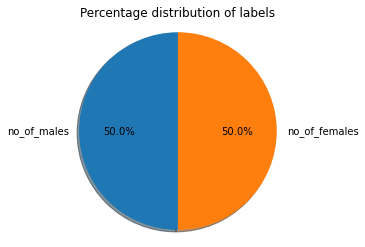

In [11]:
print('------------------2)Depict percentage distribution of label on a pie chart---------------------------------')
data = [no_of_males,no_of_females]
label = ['no_of_males','no_of_females']
plt.pie(data, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage distribution of labels')
plt.axis('equal')
plt.show()


In [12]:
'3)Considering all the features as independent feature and label as dependent feature,split the dataset training and testing data with test size=20%'

'3)Considering all the features as independent feature and label as dependent feature,split the dataset training and testing data with test size=20%'

In [13]:
X=X.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2)

-------------------------------------Decision_Tree_Classifier------------------------------------------


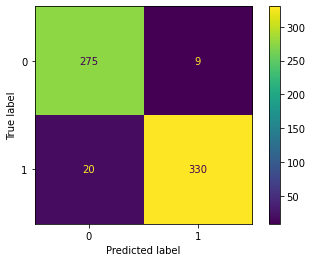

              precision    recall  f1-score   support

        male       0.93      0.97      0.95       284
      female       0.97      0.94      0.96       350

    accuracy                           0.95       634
   macro avg       0.95      0.96      0.95       634
weighted avg       0.95      0.95      0.95       634



In [14]:
print('-------------------------------------Decision_Tree_Classifier------------------------------------------')
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train,y_train)
y_pred_DecisionTreeClassifier=decision_tree.predict(x_test)
cm = confusion_matrix(y_test,y_pred_DecisionTreeClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_test,y_pred_DecisionTreeClassifier, target_names=['male','female']))

----------------------------------------Random_Forest_Classifier--------------------------------------------


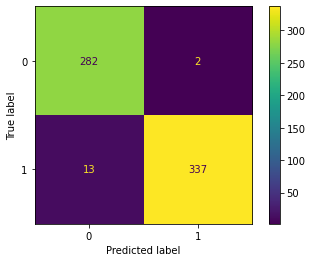

              precision    recall  f1-score   support

        male       0.96      0.99      0.97       284
      female       0.99      0.96      0.98       350

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [15]:
print('----------------------------------------Random_Forest_Classifier--------------------------------------------')
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(x_train, y_train)
y_pred_randomforest=clf_random_forest.predict(x_test)
cm_random_forest = confusion_matrix(y_test,y_pred_randomforest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest)
disp.plot()

plt.show()
print(classification_report(y_test,y_pred_randomforest, target_names=['male','female']))

--------------------------------------KNN-Classifier------------------------------------------------------


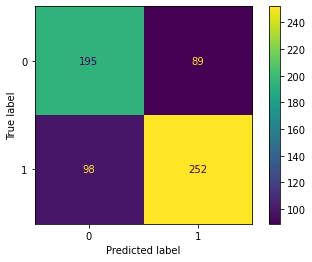

              precision    recall  f1-score   support

        male       0.67      0.69      0.68       284
      female       0.74      0.72      0.73       350

    accuracy                           0.71       634
   macro avg       0.70      0.70      0.70       634
weighted avg       0.71      0.71      0.71       634



In [16]:
print('--------------------------------------KNN-Classifier------------------------------------------------------')
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)

y_pred_KNN=neigh.predict(x_test)
cm_KNN = confusion_matrix(y_test,y_pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN)
disp.plot()

plt.show()
print(classification_report(y_test,y_pred_KNN, target_names=['male','female']))

----------------------------------------------Logistic-Regression------------------------------------------------


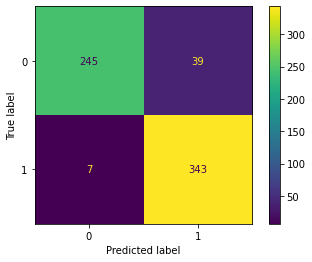

              precision    recall  f1-score   support

        male       0.97      0.86      0.91       284
      female       0.90      0.98      0.94       350

    accuracy                           0.93       634
   macro avg       0.94      0.92      0.93       634
weighted avg       0.93      0.93      0.93       634



In [17]:
print('----------------------------------------------Logistic-Regression------------------------------------------------')
clf_logistic_regression = LogisticRegression( max_iter=1000)
clf_logistic_regression.fit(x_train, y_train)
y_pred_logistic_regression=clf_logistic_regression.predict(x_test)
cm_logistic_regression = confusion_matrix(y_test,y_pred_logistic_regression)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_regression )
disp.plot()

plt.show()
print(classification_report(y_test,y_pred_logistic_regression, target_names=['male','female']))

-------------------------------------------------SVM-Classifier----------------------------------------------------


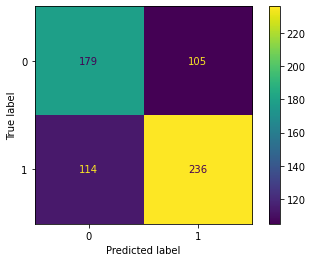

              precision    recall  f1-score   support

        male       0.61      0.63      0.62       284
      female       0.69      0.67      0.68       350

    accuracy                           0.65       634
   macro avg       0.65      0.65      0.65       634
weighted avg       0.66      0.65      0.66       634



In [18]:

print('-------------------------------------------------SVM-Classifier----------------------------------------------------')
clf_svm = svm.SVC()
clf_svm.fit(x_train, y_train)
y_pred_svm=clf_svm .predict(x_test)
cm_svm = confusion_matrix(y_test,y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm )
disp.plot()

plt.show()
print(classification_report(y_test,y_pred_svm, target_names=['male','female']))

In [19]:
print('Accuracy of DecisionTreeClassifier : ',accuracy_score(y_test, y_pred_DecisionTreeClassifier))
print('Accuracy of RandomForestClassifier : ',accuracy_score(y_test, y_pred_randomforest))
print('Accuracy of KNeighborsClassifier : ',accuracy_score(y_test, y_pred_KNN))
print('Accuracy of LogisticRegression : ',accuracy_score(y_test,y_pred_logistic_regression))
print('Accuracy of SVM-Classifier : ',accuracy_score(y_test,y_pred_svm))

Accuracy of DecisionTreeClassifier :  0.9542586750788643
Accuracy of RandomForestClassifier :  0.9763406940063092
Accuracy of KNeighborsClassifier :  0.7050473186119873
Accuracy of LogisticRegression :  0.9274447949526814
Accuracy of SVM-Classifier :  0.6545741324921136


In [20]:
dit={accuracy_score(y_test, y_pred_DecisionTreeClassifier):'DecisionTreeClassifier',accuracy_score(y_test, y_pred_randomforest):'RandomForestClassifier',accuracy_score(y_test, y_pred_KNN):'KNeighborsClassifier',accuracy_score(y_test,y_pred_logistic_regression):'LogisticRegression',accuracy_score(y_test,y_pred_svm):'Accuracy of SVM-Classifier'}

print(f'The model with best accuracy is {dit[max(dit.keys())]} which has the accuracy of {max(dit.keys())}')

The model with best accuracy is RandomForestClassifier which has the accuracy of 0.9763406940063092
